In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
df_wages_male = pd.read_excel("Wages_male.xls")
df_wages_female = pd.read_excel("Wages_female.xls")
df_vulnerable_male = pd.read_excel("Vulnerable_male.xls")
df_vulnerable_female = pd.read_excel("Vulnerable_female.xls")
df_unemployment_15_male = pd.read_excel("Unemployment_15_24_male.xls")
df_unemployment_15_female = pd.read_excel("Unemployment_15_24_female.xls")
df_total_unemployment_male = pd.read_excel("Total_Unemployment_male.xls")
df_total_unemployment_female = pd.read_excel("Total_Unemployment_female.xls")
df_laborforce_male = pd.read_excel("labor_force_participation_rate_male.xls")
df_laborforce_female = pd.read_excel("labor_force_participation_rate_female.xls")
df_services_male = pd.read_excel("Employment_services_male.xls")
df_services_female = pd.read_excel("Employment_services_female.xls")
df_agriculture_male = pd.read_excel("Employment_agriculture_male.xls")
df_agriculture_female = pd.read_excel("Employment_agriculture_female.xls")
df_industry_male = pd.read_excel("Employment_indusrty_male.xls")
df_industry_female = pd.read_excel("Employment_indusrty_female.xls")
df_contributing_male = pd.read_excel("Contributing_family _workers_male.xls")
df_contributing_female = pd.read_excel("Contributing_family _workers_female.xls")
df_economy_types = pd.read_excel("economy_types.xlsx")
df_employment_female = pd.read_excel("EmploymentToPopulationRatio_15+_female.xls")
df_employment_male = pd.read_excel("EmploymentToPopulationRatio_15+_male.xls")

# Calculations

## Gender Employment Parity Index (GEPI)

In [3]:
dict_GenderEmploymentIndex = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 'Region' : df_economy_types['Region'] }
year_list = []
j, k = 1, 0

#employment_ratio = 
for i in range(30):
    
    #Creating the string representation of the year
    if(i <=8):
        year_str = '199'+str(j)
        j +=1
    elif (i >= 9 and i <= 18) :
        year_str = '200'+str(k)
        k +=1
    else:
        year_str = '20'+str(k)
        k +=1
    year_list.append(year_str)
    
    #Using Employment in Industry, Services and Agriculture as factors and normalizing it by total employment %    
    factor_services = (df_services_female[year_str]*df_employment_female[year_str])/(df_services_male[year_str]*df_employment_male[year_str])
    factor_agriculture = (df_agriculture_female[year_str]*df_employment_female[year_str])/(df_agriculture_male[year_str]*df_employment_male[year_str])
    factor_industry = (df_industry_female[year_str]*df_employment_female[year_str])/(df_industry_male[year_str]*df_employment_male[year_str])
    dict_GenderEmploymentIndex[year_str] = (factor_industry + factor_services + factor_agriculture)/3
    

#Creating GEI dataframe 
df_GenderEmploymentIndex = pd.DataFrame(dict_GenderEmploymentIndex)
df_GenderEmploymentIndex.head(3)
#df_GenderEmploymentIndex.to_excel("GenderEmploymentIndex.xls", index = False)

,Country Name,IncomeGroup,Region,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Low income,South Asia,0.175509,0.175674,0.175586,0.174958,0.173189,0.171336,0.168538,...,0.184546,0.195280,0.213194,0.232415,0.253197,0.278332,0.306192,0.316516,0.321914,0.326837
1,Angola,Lower middle income,Sub-Saharan Africa,0.838068,0.834380,0.828815,0.827345,0.831461,0.835798,0.839902,...,0.756128,0.760758,0.764174,0.766792,0.767362,0.767134,0.765728,0.765202,0.769341,0.773384
2,Albania,Upper middle income,Europe & Central Asia,0.664991,0.664567,0.653707,0.649168,0.641363,0.633962,0.640241,...,0.678610,0.713505,0.690858,0.681210,0.688478,0.699921,0.710240,0.713387,0.709873,0.709791


In [4]:
# df_GenderEmploymentIndex[df_GenderEmploymentIndex['Region'] == "Latin America & Caribbean"]

## Top 5 Countries of Every Region by GEPI

### Average of all 3 factors (2016 - 2020) for all Countries

In [5]:
dict_AvgIndex = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 
                 'Region' : df_economy_types['Region'], 'Avg_GEPI' : df_GenderEmploymentIndex['2016'],
                 'Avg_service' : (df_services_female['2016']*df_employment_female['2016'])/(df_services_male['2016']*df_employment_male['2016']), 
                 'Avg_agri' : (df_agriculture_female['2016']*df_employment_female['2016'])/(df_agriculture_male['2016']*df_employment_male['2016']) , 
                 'Avg_industry' :(df_industry_female['2016']*df_employment_female['2016'])/(df_industry_male['2016']*df_employment_male['2016']) }

for i in range(26,30):
    dict_AvgIndex['Avg_GEPI'] += df_GenderEmploymentIndex[year_list[i]]
    dict_AvgIndex['Avg_service'] += (df_services_female[year_list[i]]*df_employment_female[year_list[i]])/(df_services_male[year_list[i]]*df_employment_male[year_list[i]])
    dict_AvgIndex['Avg_agri'] += (df_agriculture_female[year_list[i]]*df_employment_female[year_list[i]])/(df_agriculture_male[year_list[i]]*df_employment_male[year_list[i]])
    dict_AvgIndex['Avg_industry'] += (df_industry_female[year_list[i]]*df_employment_female[year_list[i]])/(df_industry_male[year_list[i]]*df_employment_male[year_list[i]])
dict_AvgIndex['Avg_GEPI'] /= 5
dict_AvgIndex['Avg_service'] /= 5
dict_AvgIndex['Avg_agri'] /= 5
dict_AvgIndex['Avg_industry'] /= 5

df_AvgIndex = pd.DataFrame(data = dict_AvgIndex)
df_AvgIndex


,Country Name,IncomeGroup,Region,Avg_GEPI,Avg_service,Avg_agri,Avg_industry
0,Afghanistan,Low income,South Asia,0.309958,0.058402,0.470232,0.401240
1,Angola,Lower middle income,Sub-Saharan Africa,0.768158,1.004873,1.229687,0.069914
2,Albania,Upper middle income,Europe & Central Asia,0.708643,0.729591,0.894452,0.501884
3,United Arab Emirates,High income,Middle East & North Africa,0.315924,0.871150,0.002731,0.073892
4,Argentina,Upper middle income,Latin America & Caribbean,0.432684,0.894570,0.212148,0.191334
...,...,...,...,...,...,...,...
182,Samoa,Upper middle income,East Asia & Pacific,0.653046,0.833697,0.086876,1.038565
183,"Yemen, Rep.",Low income,Middle East & North Africa,0.082265,0.048639,0.121300,0.076856
184,South Africa,Upper middle income,Sub-Saharan Africa,0.577493,1.018219,0.442452,0.271808
185,Zambia,Lower middle income,Sub-Saharan Africa,0.738878,0.903473,1.082803,0.230358


### Getting the top 5 countries per Region

In [9]:
df_group = pd.DataFrame(data = df_AvgIndex.groupby('Region')['Avg_GEPI'].nlargest(5).index)
indices = [df_group[0][i][1] for i in range(0,32)]
dict_AvgTopFive = {'Region' : [], 'Country Name' : [], 'Avg_GEPI' : [] ,
                  'Avg_service' : [], 'Avg_agri' : [], 'Avg_industry' : []}

for i in range (len(indices)):
    dict_AvgTopFive['Country Name'].append(df_AvgIndex.iloc[indices[i]][0])
    #dict_AvgTopFive['IncomeGroup'].append(df_AvgIndex.iloc[indices[i]][1])
    dict_AvgTopFive['Region'].append(df_AvgIndex.iloc[indices[i]][2])
    dict_AvgTopFive['Avg_GEPI'].append(df_AvgIndex.iloc[indices[i]][3])
    dict_AvgTopFive['Avg_service'].append(df_AvgIndex.iloc[indices[i]][4])
    dict_AvgTopFive['Avg_agri'].append(df_AvgIndex.iloc[indices[i]][4])
    dict_AvgTopFive['Avg_industry'].append(df_AvgIndex.iloc[indices[i]][6])
df_AvgTopFive = pd.DataFrame(data=dict_AvgTopFive)
df_AvgTopFive.head(10)

,Region,Country Name,Avg_GEPI,Avg_service,Avg_agri,Avg_industry
0,East Asia & Pacific,Tonga,0.910566,0.599309,0.599309,2.093604
1,East Asia & Pacific,Vietnam,0.877993,1.039309,1.039309,0.648098
2,East Asia & Pacific,Lao PDR,0.876817,1.036051,1.036051,0.578884
3,East Asia & Pacific,Cambodia,0.857939,0.823030,0.823030,0.773495
4,East Asia & Pacific,Solomon Islands,0.801970,1.167200,1.167200,0.275865
5,Europe & Central Asia,Moldova,0.828933,1.273235,1.273235,0.484023
6,Europe & Central Asia,Azerbaijan,0.815063,1.000927,1.000927,0.236407
7,Europe & Central Asia,Slovenia,0.770181,1.279525,1.279525,0.369049
8,Europe & Central Asia,Belarus,0.739282,1.410911,1.410911,0.380040
9,Europe & Central Asia,Austria,0.716971,1.202104,1.202104,0.262675


## Three Factors Temporal Data

In [171]:
dict_services = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 
                 'Region' : df_economy_types['Region'] }
dict_agri = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 
                 'Region' : df_economy_types['Region'] }
dict_industry = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 
                 'Region' : df_economy_types['Region'] }

for i in year_list:
    dict_services[i] = (df_services_female[i]*df_employment_female[i])/(df_services_male[i]*df_employment_male[i])
    dict_agri[i] = (df_agriculture_female[i]*df_employment_female[i])/(df_agriculture_male[i]*df_employment_male[i])
    dict_industry[i] = (df_industry_female[i]*df_employment_female[i])/(df_industry_male[i]*df_employment_male[i])
df_service = pd.DataFrame(data = dict_services)
df_agriculture = pd.DataFrame(data = dict_agri)
df_industry = pd.DataFrame(data = dict_industry)

service = df_service.groupby(['Region']).mean().reset_index().T
service = service.rename(columns=service.iloc[0]).drop(service.index[0]).reset_index()

agriculture = df_agriculture.groupby(['Region']).mean().reset_index().T
agriculture = agriculture.rename(columns=agriculture.iloc[0]).drop(agriculture.index[0]).reset_index()

industry = df_industry.groupby(['Region']).mean().reset_index().T
industry = industry.rename(columns=industry.iloc[0]).drop(industry.index[0]).reset_index()

# Visual Analysis

## Regional GEPI

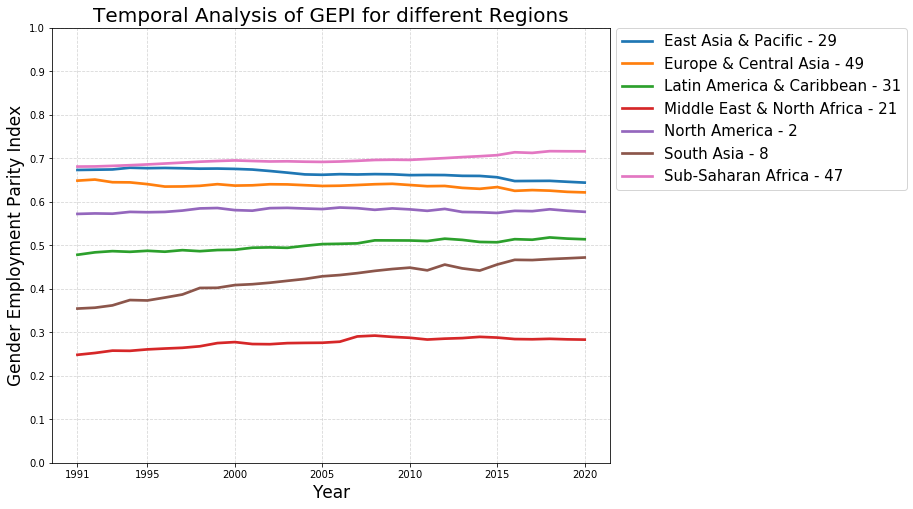

In [7]:
l = df_GenderEmploymentIndex.groupby(['Region']).mean().reset_index().T
l = l.rename(columns=l.iloc[0]).drop(l.index[0]).reset_index()
#print(l)


fig, ax = plt.subplots(figsize= (10,8))
uniq, counts = np.unique(df_economy_types['Region'], return_counts=True)
for i in range(0,7):
    plt.plot(l['index'], l[uniq[i]], label = uniq[i]+' - '+str(counts[i]), linewidth = 2.7)

plt.xticks(np.array(['1991','1995', '2000', '2005', '2010', '2015', '2020']))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Temporal Analysis of GEPI for different Regions", fontsize = 20)
plt.xlabel("Year", fontsize = 17)
plt.ylabel("Gender Employment Parity Index", fontsize = 17)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left", borderaxespad=0, fontsize = 15)
plt.grid(which='both', axis='both', linestyle = '--', alpha = 0.5)
plt.show()


- Clearly no country has equal proportion of men and women emloyed. 
- Middle East and North African countries have the smallest index implying large gender bias
- Countries in North and South America and Europe have higher indices which goes with the norm
- Top five countries with the maximum number of women in the workforce are located in Sub-Saharan Africa. While this signifies progress, many women in this region are employed informally making them more likely to be underpaid, exploited and impoverished as well as having minimal job security.
- Of the women employed in Sub-Saharan Africa, 74 percent of them work in the informal sector which is significantly greater than the 61 percent of men in the region who are informally employed. 


## Temporal Analysis of 3 Factors for Different Regions

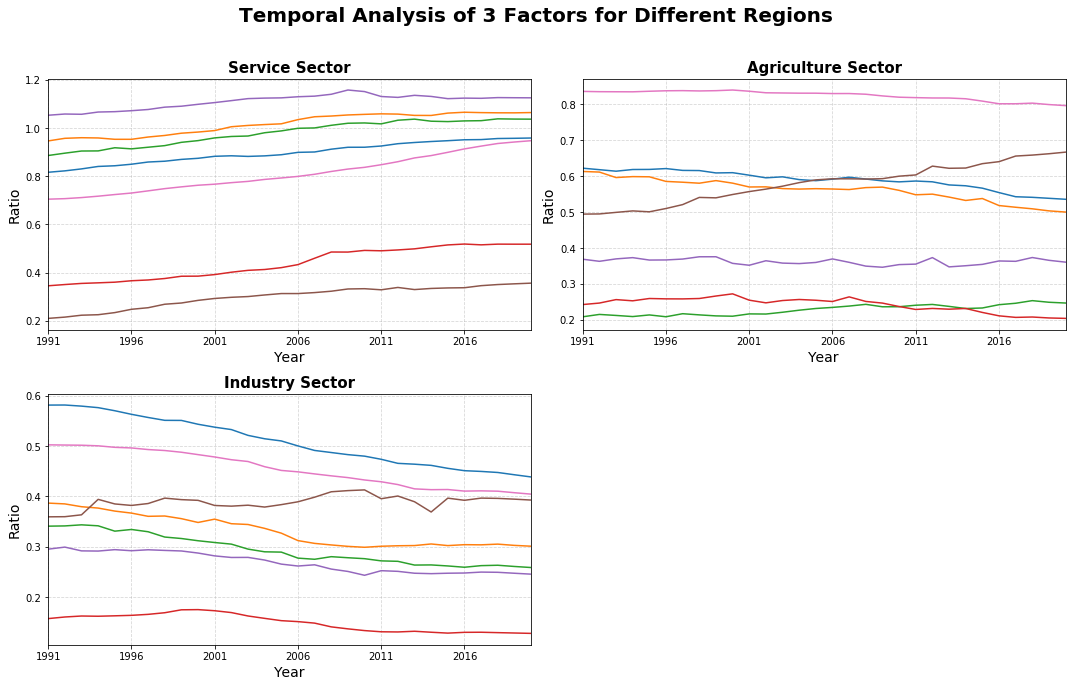

In [201]:
sectors = ['Service', 'Agriculture', 'Industry']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (15,10))
uniq, counts = np.unique(df_economy_types['Region'], return_counts=True)
for i in range(0, 3):
    if(i == 0) :
        ax = service.plot.line(x = 'index', rot=0, ax=axes[0,0])
    elif(i == 1) :
        ax = agriculture.plot.line(x = 'index', rot=0, ax=axes[0,1])
    elif(i == 2) :
        ax = industry.plot.line(x = 'index', rot=0, ax=axes[1,0])
    ax.set_title(sectors[i]+" Sector", fontsize = 15, fontweight ="bold")
    ax.set_ylabel("Ratio", fontsize = 14)
    ax.set_xlabel("Year", fontsize = 14)
    ax.get_legend().remove()
    ax.grid(which='both', axis='both', linestyle = '--', alpha = 0.5)

fig.delaxes(axes[1][1])    
fig.suptitle('Temporal Analysis of 3 Factors for Different Regions',fontweight ="bold", fontsize = 20)
fig.tight_layout(rect=[0, 0.03, 1, 0.92])
    

## Top 5 Countires per Region

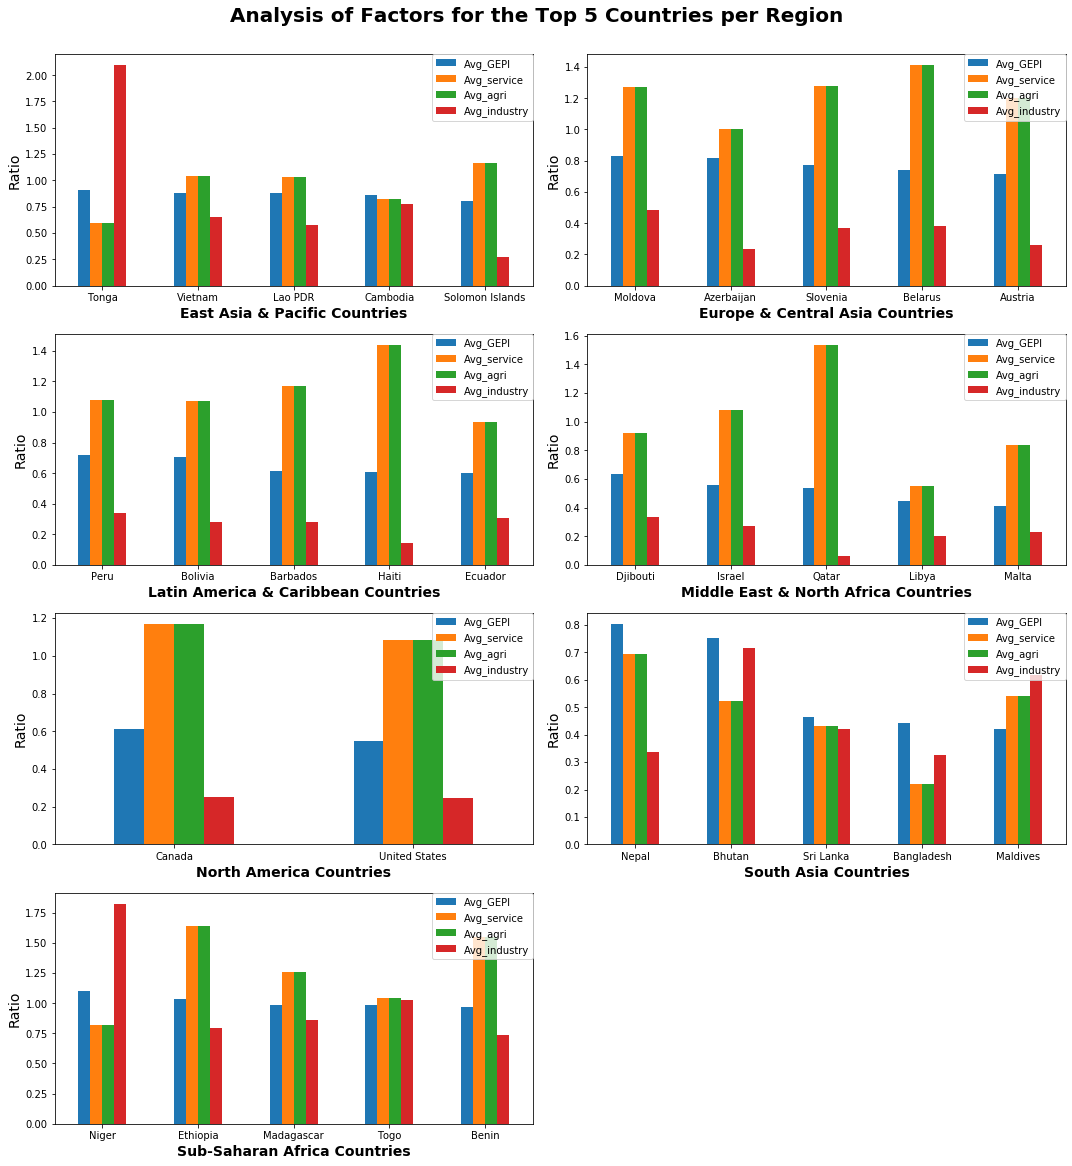

In [189]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize= (15,17))
uniq, counts = np.unique(df_economy_types['Region'], return_counts=True)
for i in range(0, 7):
    if(i == 0) :
        ax = df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]].plot.bar(rot=0, ax=axes[0,0])
    elif(i == 1) :
        ax = df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]].plot.bar(rot=0, ax=axes[0,1])
    elif(i == 2) :
        ax = df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]].plot.bar(rot=0, ax=axes[1,0])
    elif(i == 3) :
        ax = df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]].plot.bar(rot=0, ax=axes[1,1])
    elif(i == 4) :
        ax = df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]].plot.bar(rot=0, ax=axes[2,0])
    elif(i == 5) :
        ax = df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]].plot.bar(rot=0, ax=axes[2,1])
    elif(i == 6) :
        ax = df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]].plot.bar(rot=0, ax=axes[3,0])
    ax.set_ylabel("Ratio", fontsize = 14)
    ax.set_xlabel(uniq[i]+" Countries", fontsize = 14, fontweight ="bold")
    if(i == 'North America'):
        ax.set_xticklabels(df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]]['Country Name'].to_list())
    else:
        ax.set_xticklabels(df_AvgTopFive[df_AvgTopFive['Region'] == uniq[i]]['Country Name'].to_list())
    ax.legend(loc="upper right", borderaxespad=0, fontsize = 10)
    
fig.suptitle('Analysis of Factors for the Top 5 Countries per Region',fontweight ="bold", fontsize = 20)
fig.delaxes(axes[3][1])
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    